### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 11.2:</span> Supervised Machine Learning: polinomio di terzo grado

Si intende ora estendere il modello dell'esercizio 11.1 al fine di ottenere un buon fit del polinomio di terzo grado:

$$
f(x)=4-3x-2x^2+3x^3
$$
con $x \in [-1,1]$.

Inserisco i parametri della funzione modello

In [21]:
# target parameters of f(x) = a*x^3 + b*x^2 + c*x + d
a = 3
b = -2
c = -3
d = 4

Si generano dunque i dati di training e quelli di validation e si pone in un grafico la funzione modello (target) ed il validation dataset

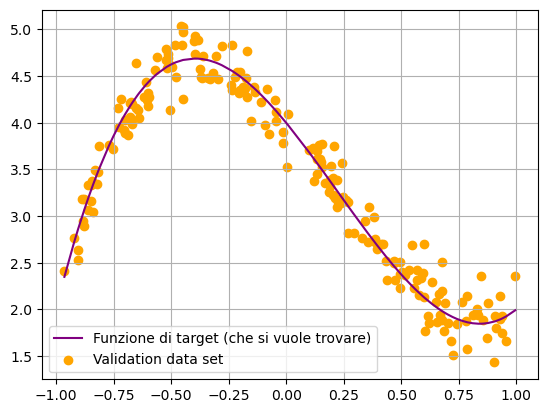

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 3000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = a * (x_valid**3) + b * (x_valid**2) + c * x_valid + d # ideal (target) linear function

sigma = 0.2 # noise standard deviation
y_train = np.random.normal(a * (x_train**3) + b * (x_train**2) + c * x_train + d, sigma) #DATI DI TRAINING
y_valid = np.random.normal(a * (x_valid**3) + b * (x_valid**2) + c * x_valid + d, sigma) #DATI DI VALIDATION

# plot validation and target dataset
plt.plot(x_valid, y_target, color = 'purple', label='Funzione di target (che si vuole trovare)')
plt.scatter(x_valid, y_valid, color='orange', label='Validation data set')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(6, input_shape=(1,), activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 12        
                                                                 
 dense_4 (Dense)             (None, 5)                 35        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
94/94 [==============================] - 1s 8ms/step - loss: 0.9913 - mse: 0.9913 - val_loss: 0.2427 - val_mse: 0.2427
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 0.3196 - mse: 0.3196 - val_loss: 0.2103 - val_mse: 0.2103
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.2694 - mse: 0.2694 - val_loss: 0.1750 - val_mse: 0.1750
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 0.2146 - mse: 0.2146 - val_loss: 0.1346 - val_mse: 0.1346
Epoch 5/50
94/94 [==============================] - 0s 3ms/step - loss: 0.1678 - mse: 0.1678 - val_loss: 0.1059 - val_mse: 0.1059
Epoch 6/50
94/94 [==============================] - 0s 3ms/step - loss: 0.1329 - mse: 0.1329 - val_loss: 0.0875 - val_mse: 0.0875
Epoch 7/50
94/94 [==============================] - 0s 3ms/step - loss: 0.1083 - mse: 0.1083 - val_loss: 0.0736 - val_mse: 0.0736
Epoch 8/50
94/94 [==============================] - 0s 3ms/step - loss: 0.0920 - mse: 0.09

In [25]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.0400 - mse: 0.0400

Test loss: 0.040006451308727264
Test accuracy: 0.040006451308727264
7/7 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026

Test loss: 0.002632829360663891
Test accuracy: 0.002632829360663891


### <span style="color:blue"> GRAFICO A) </span> Funzione di costo

Terminata la fase di training della rete sono stati graficati gli andamenti della funzione di costo dei dati di train e test in funzione dell'epoca.

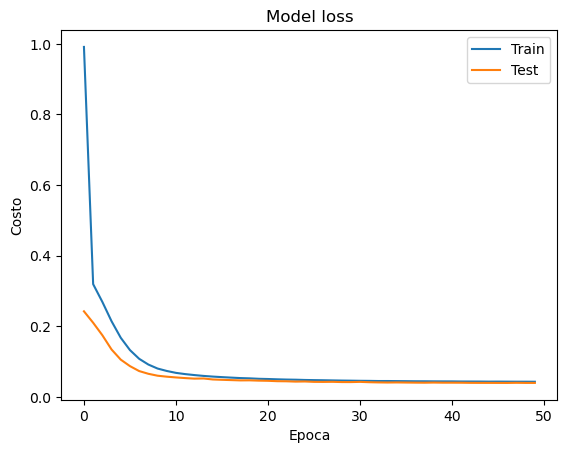

In [26]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Costo')
plt.xlabel('Epoca')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

### <span style="color:green"> GRAFICO B) </span>: Predizione entro il dominio di training

Predizione entro il dominio $[-1,1]$ $\Rightarrow$ ottima corrispondenza!

4/4 [==============================] - 0s 5ms/step


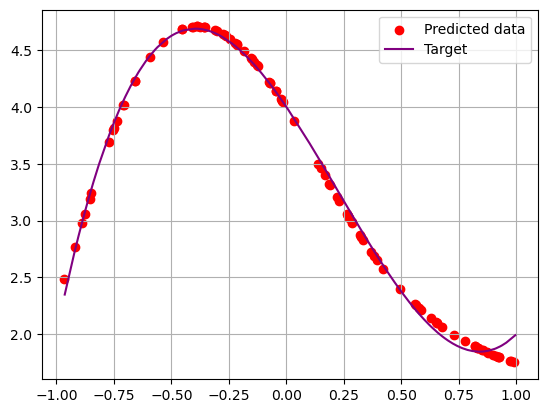

In [27]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r', label = 'Predicted data')
plt.plot(x_valid, y_target, color='purple', label = 'Target')
plt.grid(True)
plt.legend()
plt.show()

### <span style="color:orange"> GRAFICO C) </span> Predizione oltre il dominio di training

Estensione del dominio oltre quello dei dati di training: per via della variazione di concavità della funzione modello la rete perde rapidamente abilità predittiva!

5/5 [==============================] - 0s 3ms/step


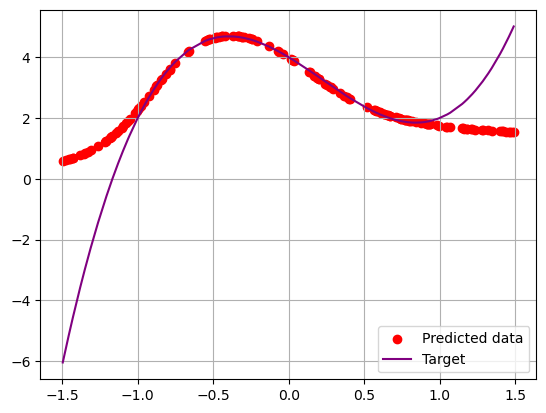

In [28]:
x = np.random.uniform(-1.5, 1.5, 150)
x.sort()

y_predicted = model.predict(x)
y_target = a * (x**3) + b * (x**2) + c * x + d

plt.scatter(x, y_predicted,color='r', label = 'Predicted data')
plt.plot(x, y_target, color='purple', label = 'Target')
plt.grid(True)
plt.legend()
plt.show()

Sono quindi state provate varie combinazioni di parametri per la costruzione della rete e del suo training. 
Le osservazioni su numero di dati in input e di epoche esplicate nell'esercitazione 1.1 rimangono valide. Inoltre si nota che:

- aumentare eccessivamente il numero di layer e di neuroni porta ad un overfitting, ovvero la rete tende a reputare vere deviazioni dovute al rumore.

- la funzione di attivazione migliore è risultata essere $\tanh$, seguita dalla ReLu

- per quanto riguarda l'ottimizzatore, SGD ha dato risultati più precisi di Adagrad e Adam